In [1]:
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import FreqDist, ngrams
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import pandas as pd

nltk.download('punkt')
nltk.download('vader_lexicon')



[nltk_data] Downloading package punkt to /home/dzakirm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dzakirm/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_parquet("../data/processed/arxiv-abstracts-cleaned_v2.parquet")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       500000 non-null  object
 1   authors                  500000 non-null  object
 2   title                    500000 non-null  object
 3   abstract                 500000 non-null  object
 4   title_clean              500000 non-null  object
 5   title_tokens             500000 non-null  object
 6   title_tokens_no_stop     500000 non-null  object
 7   title_lemmatized         500000 non-null  object
 8   title_stemmed            500000 non-null  object
 9   title_entities           500000 non-null  object
 10  title_pos_tags           500000 non-null  object
 11  abstract_clean           500000 non-null  object
 12  abstract_tokens          500000 non-null  object
 13  abstract_tokens_no_stop  500000 non-null  object
 14  abstract_lemmatized 

## Title Analysis

In [3]:
# -------------------------------
# Frequency Analysis
# -------------------------------
# Compute word frequencies across the entire dataset
all_tokens = [token for tokens in df['title_lemmatized'] for token in tokens]
word_freq = FreqDist(all_tokens)
print("Top 10 words:")
print(word_freq.most_common(10))


Top 10 words:
[('model', 36168), ('quantum', 26836), ('system', 21493), ('theory', 17272), ('network', 17250), ('use', 16546), ('field', 15871), ('equation', 13653), ('effect', 12589), ('dynamic', 12452)]


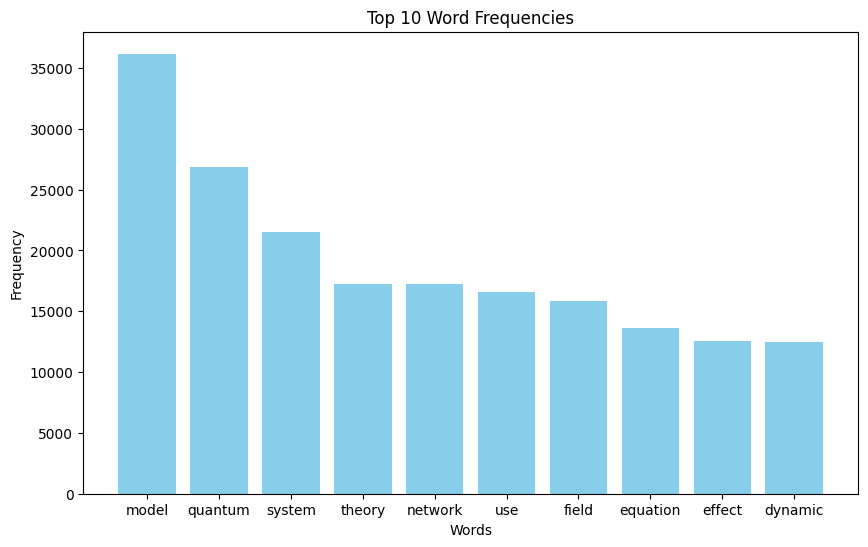

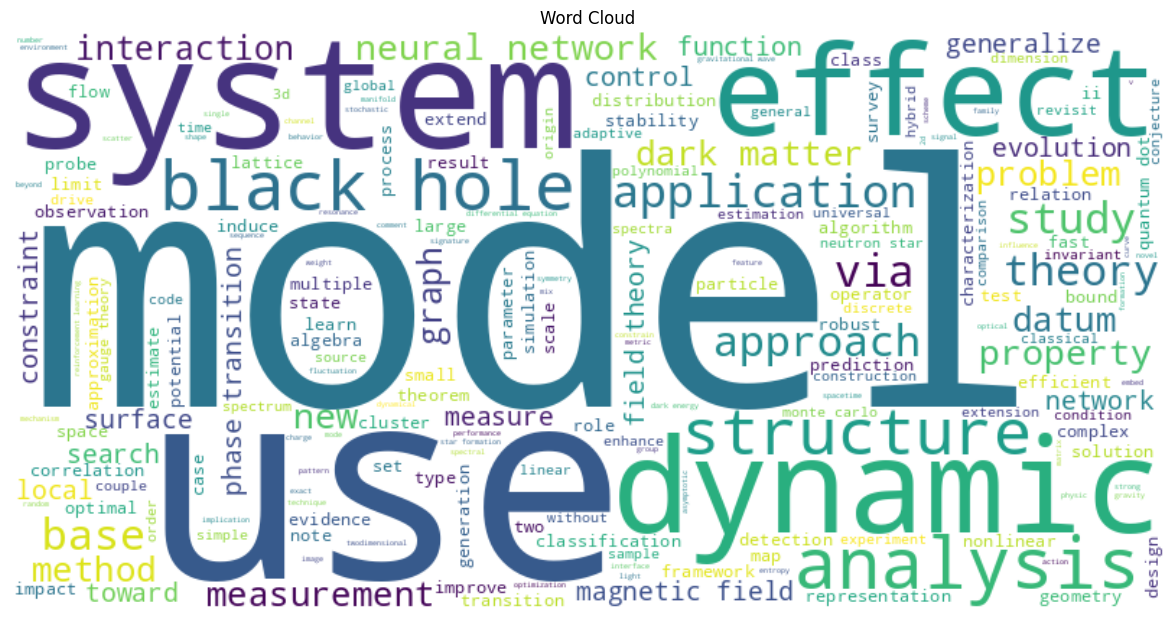

Top 10 bigrams:
[(('black', 'hole'), 5848), (('neural', 'network'), 4423), (('dark', 'matter'), 3559), (('magnetic', 'field'), 3171), (('phase', 'transition'), 2644), (('field', 'theory'), 2632), (('monte', 'carlo'), 1501), (('quantum', 'dot'), 1452), (('gauge', 'theory'), 1393), (('gravitational', 'wave'), 1370)]


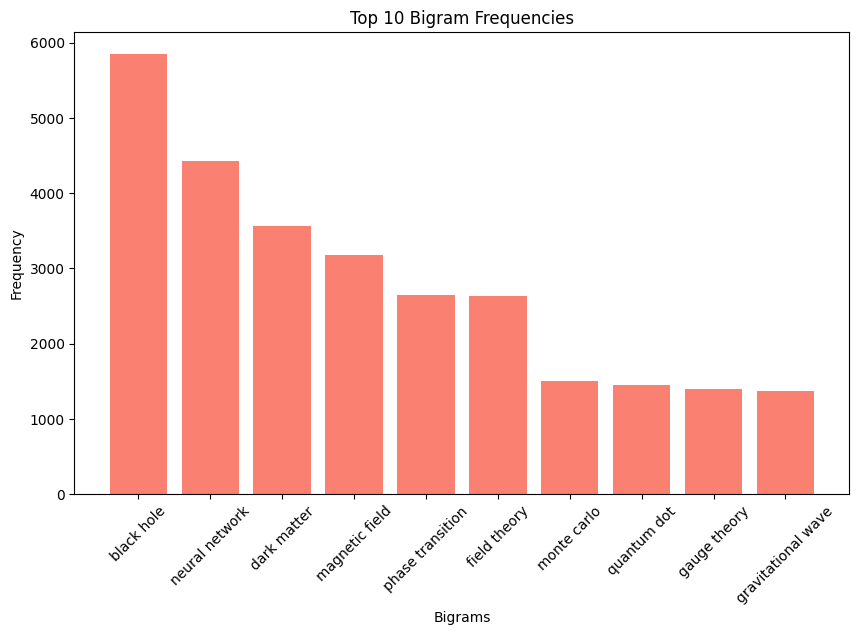

Top 10 trigrams:
[(('convolutional', 'neural', 'network'), 884), (('deep', 'neural', 'network'), 783), (('quantum', 'field', 'theory'), 554), (('effective', 'field', 'theory'), 423), (('heavy', 'ion', 'collision'), 421), (('quantum', 'phase', 'transition'), 406), (('nonlinear', 'schroding', 'equation'), 397), (('quantum', 'key', 'distribution'), 372), (('van', 'der', 'waal'), 355), (('generative', 'adversarial', 'network'), 355)]


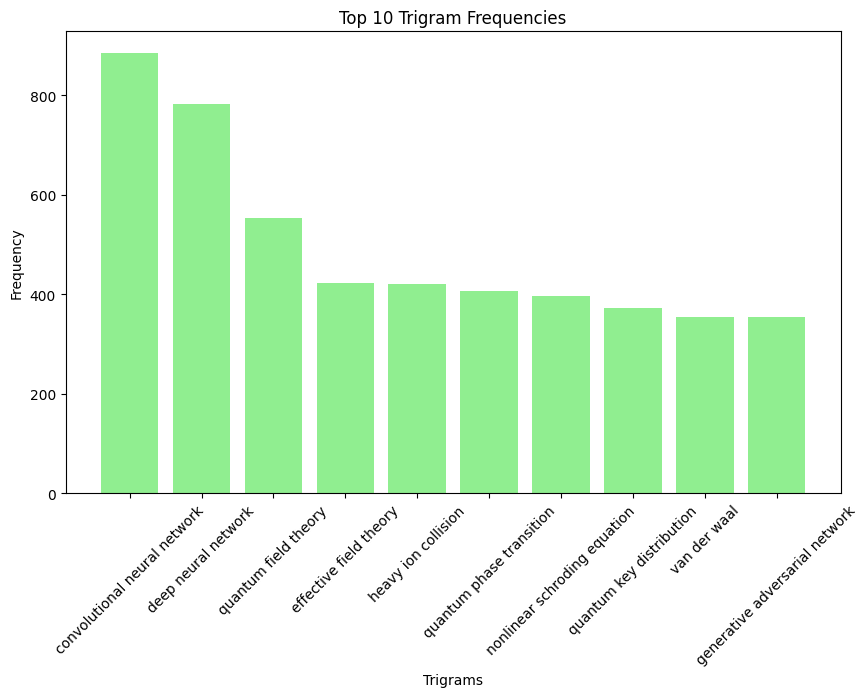

In [4]:
# Plot Top 10 Word Frequencies
words, counts = zip(*word_freq.most_common(10))
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_tokens))
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()

# N‑gram Frequency Analysis (Bigrams & Trigrams)
bigrams = list(ngrams(all_tokens, 2))
bigram_freq = FreqDist(bigrams)
print("Top 10 bigrams:")
print(bigram_freq.most_common(10))

bigram_words = [" ".join(bigram) for bigram, count in bigram_freq.most_common(10)]
bigram_counts = [count for bigram, count in bigram_freq.most_common(10)]
plt.figure(figsize=(10, 6))
plt.bar(bigram_words, bigram_counts, color='salmon')
plt.title("Top 10 Bigram Frequencies")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

trigrams = list(ngrams(all_tokens, 3))
trigram_freq = FreqDist(trigrams)
print("Top 10 trigrams:")
print(trigram_freq.most_common(10))

trigram_words = [" ".join(trigram) for trigram, count in trigram_freq.most_common(10)]
trigram_counts = [count for trigram, count in trigram_freq.most_common(10)]
plt.figure(figsize=(10, 6))
plt.bar(trigram_words, trigram_counts, color='lightgreen')
plt.title("Top 10 Trigram Frequencies")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

## Abstract

In [5]:
# -------------------------------
# Frequency Analysis
# -------------------------------
# Compute word frequencies across the entire dataset
all_tokens = [token for tokens in df['abstract_lemmatized'] for token in tokens]
word_freq = FreqDist(all_tokens)
print("Top 10 words:")
print(word_freq.most_common(10))

Top 10 words:
[('model', 328760), ('use', 297704), ('show', 237786), ('result', 230654), ('system', 186965), ('study', 169328), ('method', 160917), ('also', 148242), ('field', 147657), ('two', 138597)]


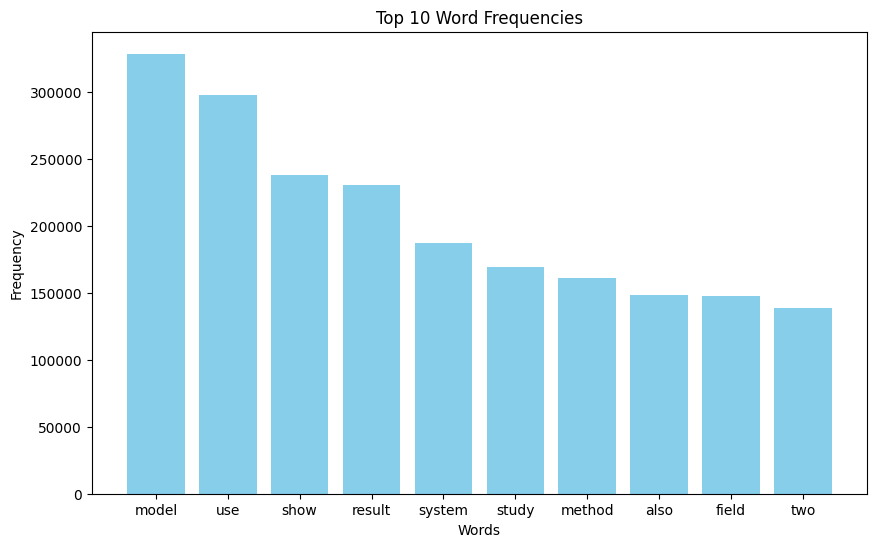

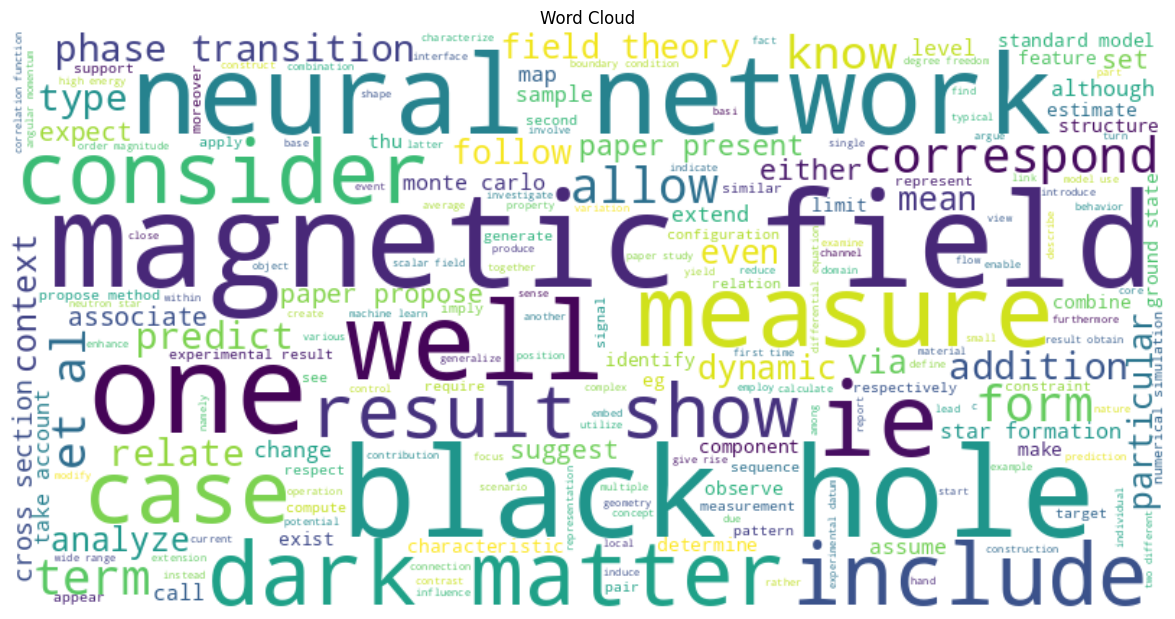

Top 10 bigrams:
[(('magnetic', 'field'), 28805), (('black', 'hole'), 25998), (('neural', 'network'), 19677), (('dark', 'matter'), 15572), (('result', 'show'), 14574), (('et', 'al'), 13456), (('phase', 'transition'), 12834), (('allow', 'we'), 12297), (('field', 'theory'), 11976), (('paper', 'present'), 10957)]


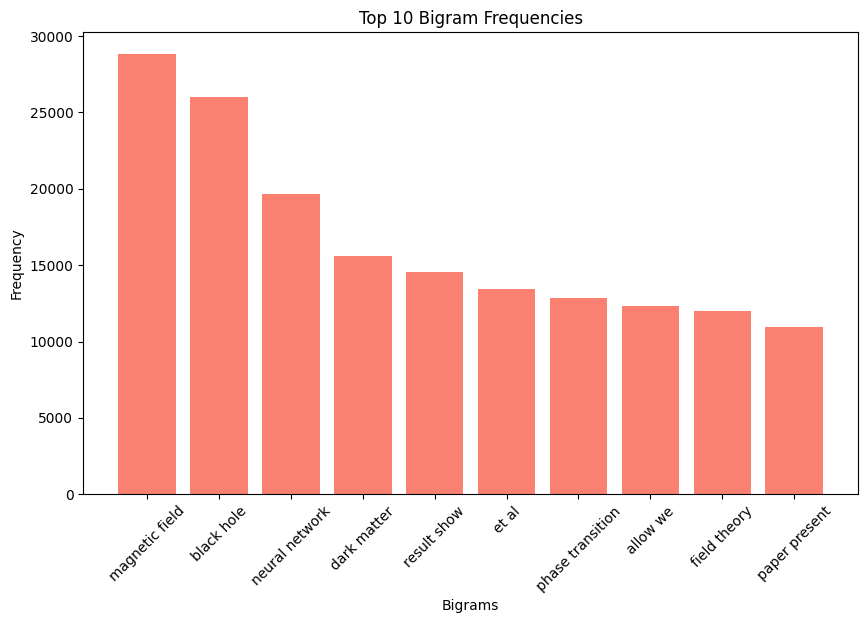

Top 10 trigrams:
[(('deep', 'neural', 'network'), 3778), (('convolutional', 'neural', 'network'), 3746), (('monte', 'carlo', 'simulation'), 3166), (('play', 'important', 'role'), 2920), (('density', 'functional', 'theory'), 2540), (('quantum', 'field', 'theory'), 2489), (('partial', 'differential', 'equation'), 2242), (('star', 'formation', 'rate'), 2211), (('necessary', 'sufficient', 'condition'), 2209), (('cosmic', 'microwave', 'background'), 2129)]


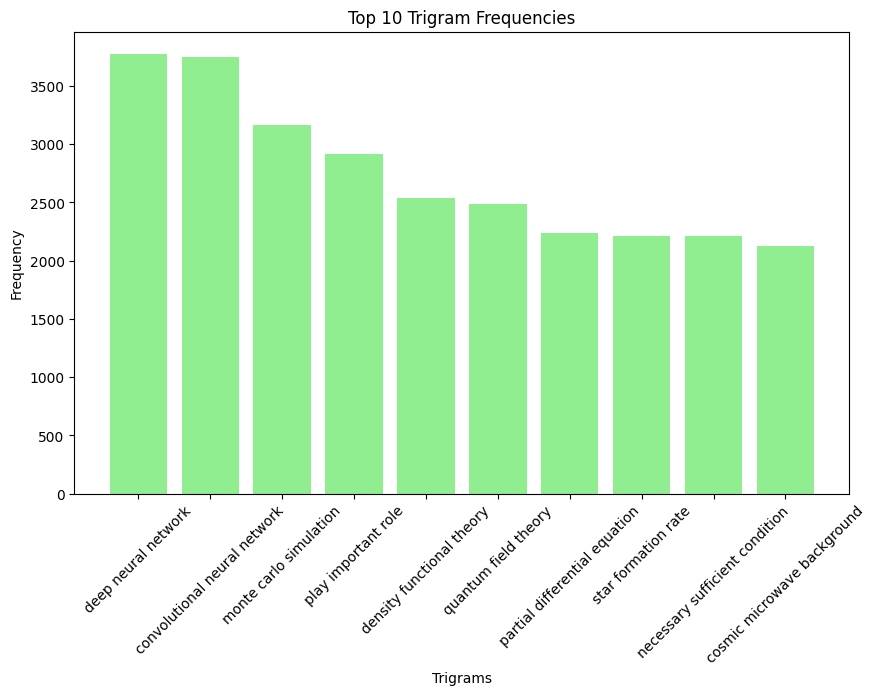

In [6]:

# Plot Top 10 Word Frequencies
words, counts = zip(*word_freq.most_common(10))
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_tokens))
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()

# N‑gram Frequency Analysis (Bigrams & Trigrams)
bigrams = list(ngrams(all_tokens, 2))
bigram_freq = FreqDist(bigrams)
print("Top 10 bigrams:")
print(bigram_freq.most_common(10))

bigram_words = [" ".join(bigram) for bigram, count in bigram_freq.most_common(10)]
bigram_counts = [count for bigram, count in bigram_freq.most_common(10)]
plt.figure(figsize=(10, 6))
plt.bar(bigram_words, bigram_counts, color='salmon')
plt.title("Top 10 Bigram Frequencies")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

trigrams = list(ngrams(all_tokens, 3))
trigram_freq = FreqDist(trigrams)
print("Top 10 trigrams:")
print(trigram_freq.most_common(10))

trigram_words = [" ".join(trigram) for trigram, count in trigram_freq.most_common(10)]
trigram_counts = [count for trigram, count in trigram_freq.most_common(10)]
plt.figure(figsize=(10, 6))
plt.bar(trigram_words, trigram_counts, color='lightgreen')
plt.title("Top 10 Trigram Frequencies")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


# Topic Modeling

In [7]:
# -------------------------------
# Topic Modeling with Gensim LDA
# -------------------------------
documents = df['abstract_lemmatized'].tolist()
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Build LDA model (adjust num_topics and passes as needed)
lda_model = gensim.models.LdaModel(corpus, num_topics=6, id2word=dictionary, passes=20)
topics = lda_model.print_topics(num_words=5)
print("LDA Topics:")
for topic in topics:
    print(topic)


LDA Topics:
(0, '0.014*"quantum" + 0.013*"system" + 0.013*"model" + 0.011*"equation" + 0.010*"state"')
(1, '0.016*"method" + 0.016*"model" + 0.013*"use" + 0.013*"algorithm" + 0.011*"propose"')
(2, '0.010*"space" + 0.010*"give" + 0.009*"show" + 0.009*"group" + 0.009*"theory"')
(3, '0.011*"star" + 0.010*"galaxy" + 0.007*"model" + 0.007*"find" + 0.006*"mass"')
(4, '0.009*"model" + 0.008*"energy" + 0.008*"magnetic" + 0.007*"use" + 0.006*"state"')
(5, '0.011*"system" + 0.010*"use" + 0.008*"network" + 0.005*"paper" + 0.005*"design"')


In [8]:
# -------------------------------
# LDA Visualization with pyLDAvis
# -------------------------------
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_visualization.html')
print("LDA visualization saved as 'lda_visualization.html'.")


LDA visualization saved as 'lda_visualization.html'.
